## Data Pre Processing 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### DataFrame Creation

In [3]:
#read data from data set 
data = pd.read_csv("DataSet/adult.data",header = None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#adding columns name from given that in adult.names file 
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week", "native-country", "income"]
#preview first five data rows from data set
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Saving the dataframe as a csv file for future references.
data.to_csv('dataset/adult_dataset.csv')

### Data Cleaning Process

In [6]:
#checking for duplicates in dataset
duplicates = data[data.duplicated()]
duplicates

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


As you can see there are some duplicate rows. So lets remove that rows

In [7]:
#remove duplicates data from dataset
data = data.drop_duplicates()
print(data[data.duplicated()])

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []


As you can see now there is no duplicate values in this dataset

### Structural Errors

In [8]:
#checking for unique values in the dataset
unique_values = data.nunique()
unique_values

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [9]:
for column in data:
    print(column)
    print(data[column].unique())
    print('\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]


education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing'

As you can see several question marks appear as unique values in the 'work class', 'occupation', and 'native-country' columns, which seem doesn't have a meaning. Let's remove them.

In [10]:
#create a copy and save it to data because we can replace values in direct dataset
data = data.copy()


In [11]:
# Checking the values in those columns and replacing ' ?' with pd.NA
data.replace(' ?', pd.NA, inplace=True)

In [12]:
#Check again if any ' ?' values remain in the dataset
for column in data:
    print(column)
    print(data[column].unique())
    print('\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 <NA> ' Self-emp-inc' ' Without-pay' ' Never-worked']


fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]


education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing'

There are some unnecessary blank spaces and " in object type data values let's remove it

In [13]:
#run a loop and remove bank spaces in object type values
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = data[i].str.strip(' ')
    


In [14]:
for column in data:
    print(column)
    print(data[column].unique())
    print('\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' <NA>
 'Self-emp-inc' 'Without-pay' 'Never-worked']


fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' <NA>

### Filling Null Values

In [15]:
#print null value count in data
null_values = data.isnull().sum()
null_values

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64

As you can see there are some missing values include in 3 columns 

    1. workClass :- 1836
    2. occupation :- 1843
    3. native-country :- 582

In [16]:
#checking the values count from the "workclass" column
workclass_counts = data["workclass"].value_counts()
workclass_counts

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

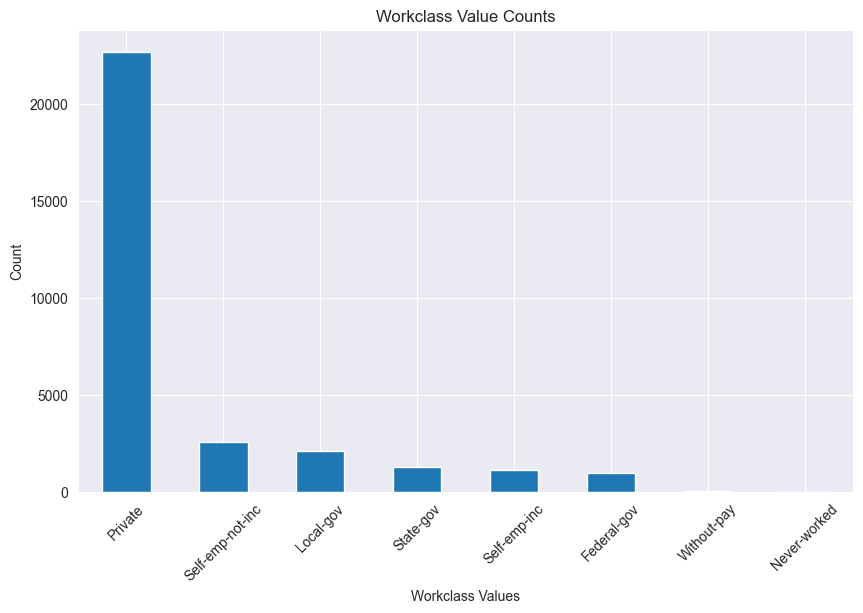

In [17]:
# Plotting the workclass column values and their counts
plt.figure(figsize=(10, 6))
workclass_counts.plot(kind='bar')
plt.title('Workclass Value Counts')
plt.xlabel('Workclass Values')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

As the above plot we can see Private value has the higher frequencies while comparing with other values. So there we can clearly see there is data unbalance in the "workclass" column (with null values). 

In [18]:
occupation_counts = data["occupation"].value_counts()
occupation_counts

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

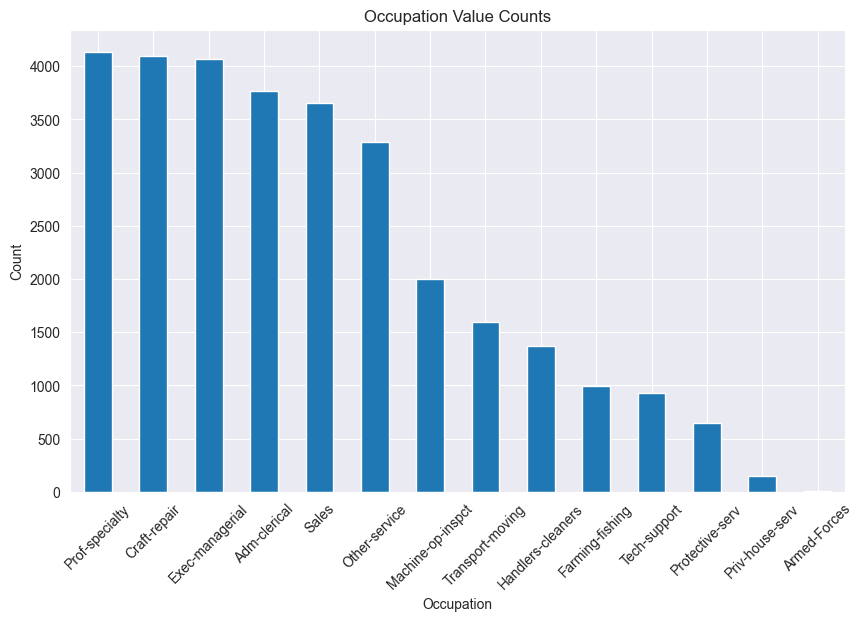

In [19]:
# Plotting
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar')
plt.title('Occupation Value Counts')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [20]:
native_country_counts = data["native-country"].value_counts()
native_country_counts

native-country
United-States                 29153
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

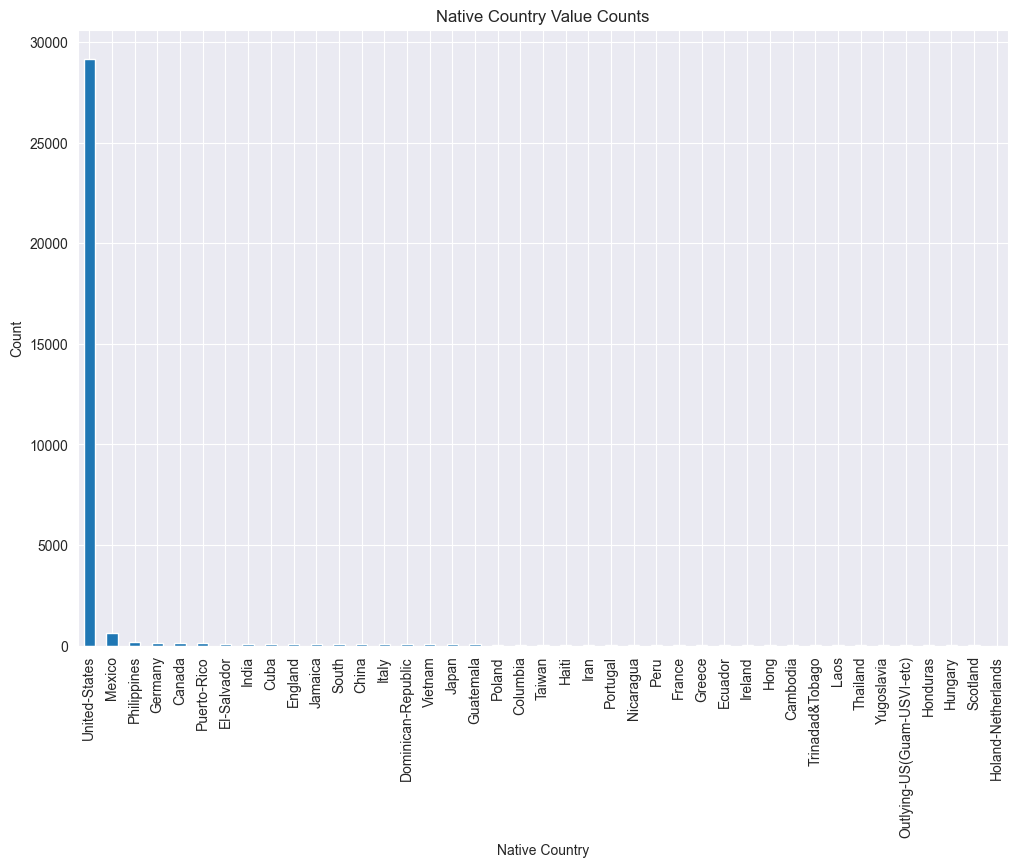

In [21]:
# Plotting
plt.figure(figsize=(12, 8))
native_country_counts.plot(kind='bar')
plt.title('Native Country Value Counts')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()


In [22]:
workclass_mode_value = data['workclass'].mode()[0]
data['workclass'].fillna(workclass_mode_value, inplace=True)

In [23]:
workclass_null_values = data["workclass"].isnull().sum()
workclass_null_values

0

In [24]:
data["workclass"].nunique()

8

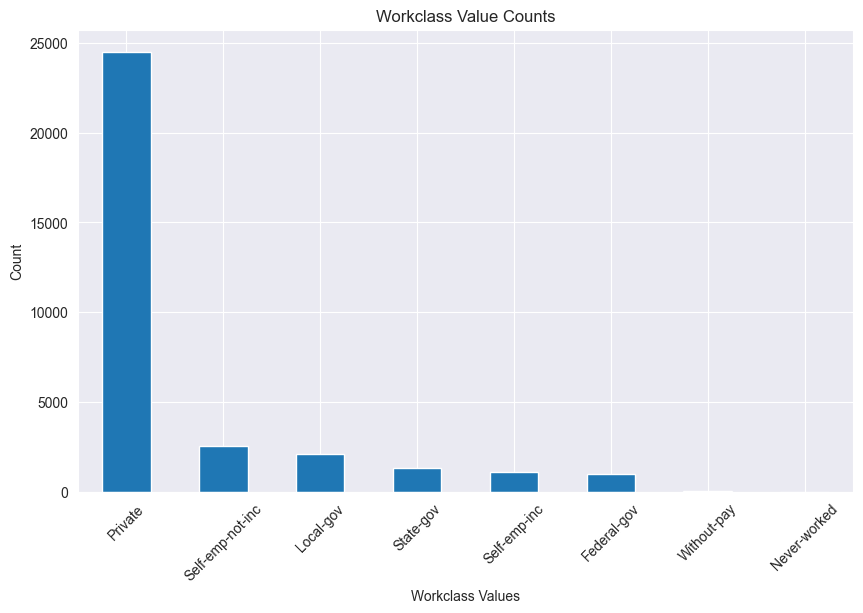

In [25]:
workclass_counts= data["workclass"].value_counts()
# Plotting the workclass column values and their counts
plt.figure(figsize=(10, 6))
workclass_counts.plot(kind='bar')
plt.title('Workclass Value Counts')
plt.xlabel('Workclass Values')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [26]:
data = data.drop(data[(data['occupation'].isna()) & (data['income'] == '<=50K')].index)
data[(data['occupation'].isna()) & (data['income'] == '<=50K')]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [27]:
occupation_mode_values = data['occupation'].mode()[0]
data['occupation'].fillna(occupation_mode_values, inplace=True)

In [28]:
occupation_null_values = data["occupation"].isnull().sum()
occupation_null_values

0

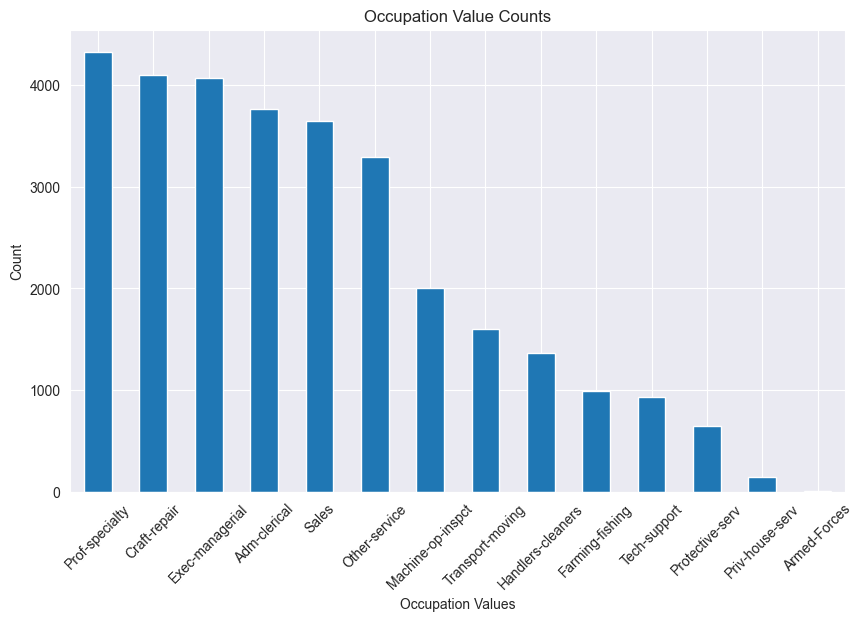

In [29]:
occupation_counts = data["occupation"].value_counts()
# Plotting the workclass column values and their counts
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar')
plt.title('Occupation Value Counts')
plt.xlabel('Occupation Values')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [30]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30885 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30885 non-null  int64 
 1   workclass       30885 non-null  object
 2   fnlwgt          30885 non-null  int64 
 3   education       30885 non-null  object
 4   education-num   30885 non-null  int64 
 5   marital-status  30885 non-null  object
 6   occupation      30885 non-null  object
 7   relationship    30885 non-null  object
 8   race            30885 non-null  object
 9   sex             30885 non-null  object
 10  capital-gain    30885 non-null  int64 
 11  capital-loss    30885 non-null  int64 
 12  hours-per-week  30885 non-null  int64 
 13  native-country  30326 non-null  object
 14  income          30885 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.8+ MB


In [31]:
data["native-country"].isnull().sum()

559

Considering Native country column 

In [32]:
#count missing values for higher income people 
missing_high_income = data[data["income"]==">50K"]["native-country"].isna().sum()
missing_low_income = data[data["income"]=="<=50K"]["native-country"].isna().sum()

In [33]:
print(f'Number of missing data rows (native country) for higher income people: {missing_high_income}')
print(f'Number of missing data rows (native country) for lower income people: {missing_low_income}')

Number of missing data rows (native country) for higher income people: 146
Number of missing data rows (native country) for lower income people: 413


As you can see in pervious steps i removed the people who earn under 50k for the balance of the dataset therefore count for low income people are 0. Lets fill the higher income peoples' missing values by using mode 

In [34]:
data["native-country"].fillna(data["native-country"].mode()[0],inplace=True)

In [35]:
missing_high_income = data[data["income"]=="<=50K"]["native-country"].isna().sum()
print(f'Number of missing data rows (native country) for higher income people: {missing_high_income}')

Number of missing data rows (native country) for higher income people: 0


Now we filled the missing values by using mode.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30885 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30885 non-null  int64 
 1   workclass       30885 non-null  object
 2   fnlwgt          30885 non-null  int64 
 3   education       30885 non-null  object
 4   education-num   30885 non-null  int64 
 5   marital-status  30885 non-null  object
 6   occupation      30885 non-null  object
 7   relationship    30885 non-null  object
 8   race            30885 non-null  object
 9   sex             30885 non-null  object
 10  capital-gain    30885 non-null  int64 
 11  capital-loss    30885 non-null  int64 
 12  hours-per-week  30885 non-null  int64 
 13  native-country  30885 non-null  object
 14  income          30885 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.8+ MB


As you can see now there are no missing values in the dataset.

In [37]:
data["native-country"].value_counts()

native-country
United-States                 28222
Mexico                          606
Philippines                     189
Germany                         128
Canada                          110
Puerto-Rico                     109
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            73
Italy                            69
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        61
Japan                            60
Poland                           57
Columbia                         56
Taiwan                           43
Haiti                            42
Iran                             42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France       

As you can see here the most of the data is belonging to the United-states country. Therefore, by using this data it will affect the model accuracy. So the best option is remove this column to gain the accuracy of the model 

In [38]:
data.drop(columns=['native-country'], inplace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


### Capital-Loss and Capital-Gain values fix

In [39]:
# Capital gain values
data['capital-gain'].value_counts()


capital-gain
0        28249
15024      347
7688       284
7298       246
99999      159
         ...  
2993         1
1455         1
4931         1
22040        1
1086         1
Name: count, Length: 118, dtype: int64

In [40]:
data['capital-loss'].value_counts()

capital-loss
0       29408
1902      202
1977      168
1887      159
1848       51
        ...  
2457        1
4356        1
1539        1
1844        1
1411        1
Name: count, Length: 90, dtype: int64

As you can see, there are huge zero values in the capital loss and capital gain columns. It will affect the model accuracy when we train the model. Therefore, the best option is to remove the capital-gain and capital-loss columns. 

In [41]:
data.drop(columns=['capital-loss','capital-gain'], inplace=True)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,<=50K


## Outlier Handling

### Age outliers

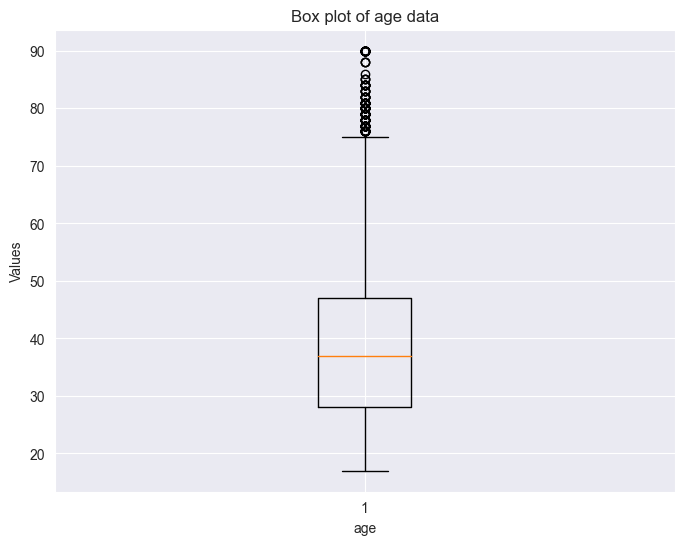

In [42]:
# Create a box plot for age feature
plt.figure(figsize=(8, 6))
plt.boxplot(data['age'])
plt.title('Box plot of age data')
plt.xlabel('age')
plt.ylabel('Values')
plt.show()

In [43]:
# Upper Bound of the Dataset

# Calculate Q1, Q3, and IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker value
upper_whisker = Q3 + 1.5 * IQR

# Find the highest data point within the upper whisker range
upper_bound_data = data['age'][data['age'] <= upper_whisker].max()

print("Upper bound within the boxplot:", upper_bound_data)

Upper bound within the boxplot: 75


As you can see, there are several outliers above the upperbound. So lets check whether those are really outliers or not and get remove them from dataset.

In [44]:
# Visualizing the Data of people above age 75
above75_high_income = data[(data['age'] >= 75) & (data['income'] == '>50K')]['age'].value_counts()
above75_low_income = data[(data['age'] >= 75) & (data['income'] == '<=50K')]['age'].value_counts()
print(f'people who earn more than 50k and above the age 75:- {above75_high_income.sum()}')
print(f'people who earn below 50k and above the age 75:- {above75_low_income.sum()}')

people who earn more than 50k and above the age 75:- 47
people who earn below 50k and above the age 75:- 169


<Axes: title={'center': 'people who earn less than 50k throughout the ages'}, xlabel='age', ylabel='Count'>

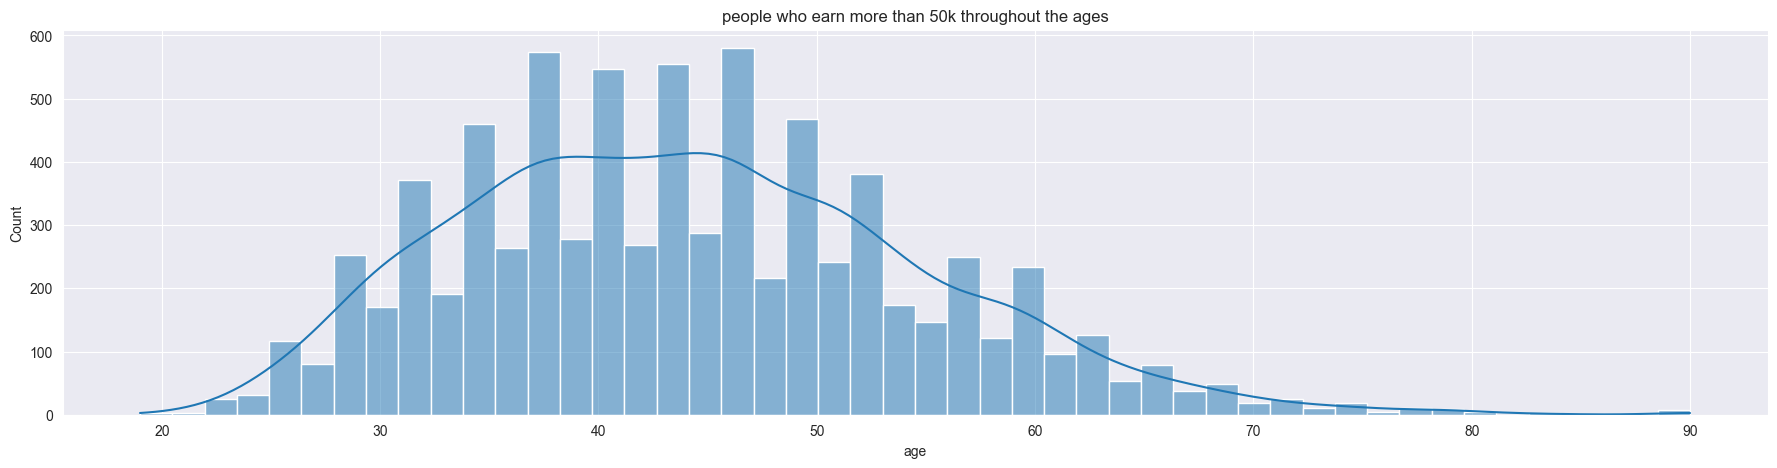

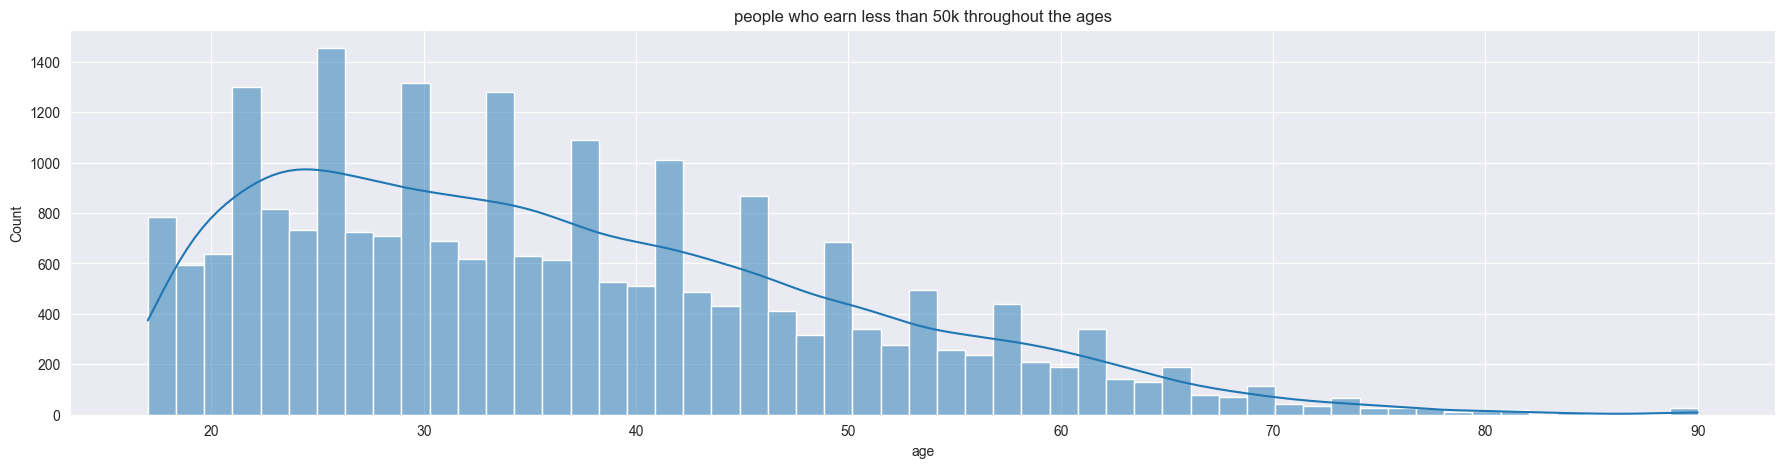

In [45]:
# Let's check how people will earn throughout the aging with KDE (Kernal Density Estimation)
above50k_earn = data[data['income'] == '>50K']['age']
plt.figure(figsize=(22, 5))
plt.title("people who earn more than 50k throughout the ages")
sns.histplot(above50k_earn,kde=True, label=column)

below50k_earn = data[data['income'] == '<=50K']['age']
plt.figure(figsize=(22, 5))
plt.title("people who earn less than 50k throughout the ages")
sns.histplot(below50k_earn,kde=True, label=column)

Analyzing both graphs, we can see that the people who earn more than 50k are somewhat similar to normal distribution. But when it comes to people who earn less than 50k, there is a huge decreasing when it comes to aging. Therefore, we can remove them as outliers.

<Axes: title={'center': 'people who earn more than 50k throughout out the ages'}, xlabel='age', ylabel='Count'>

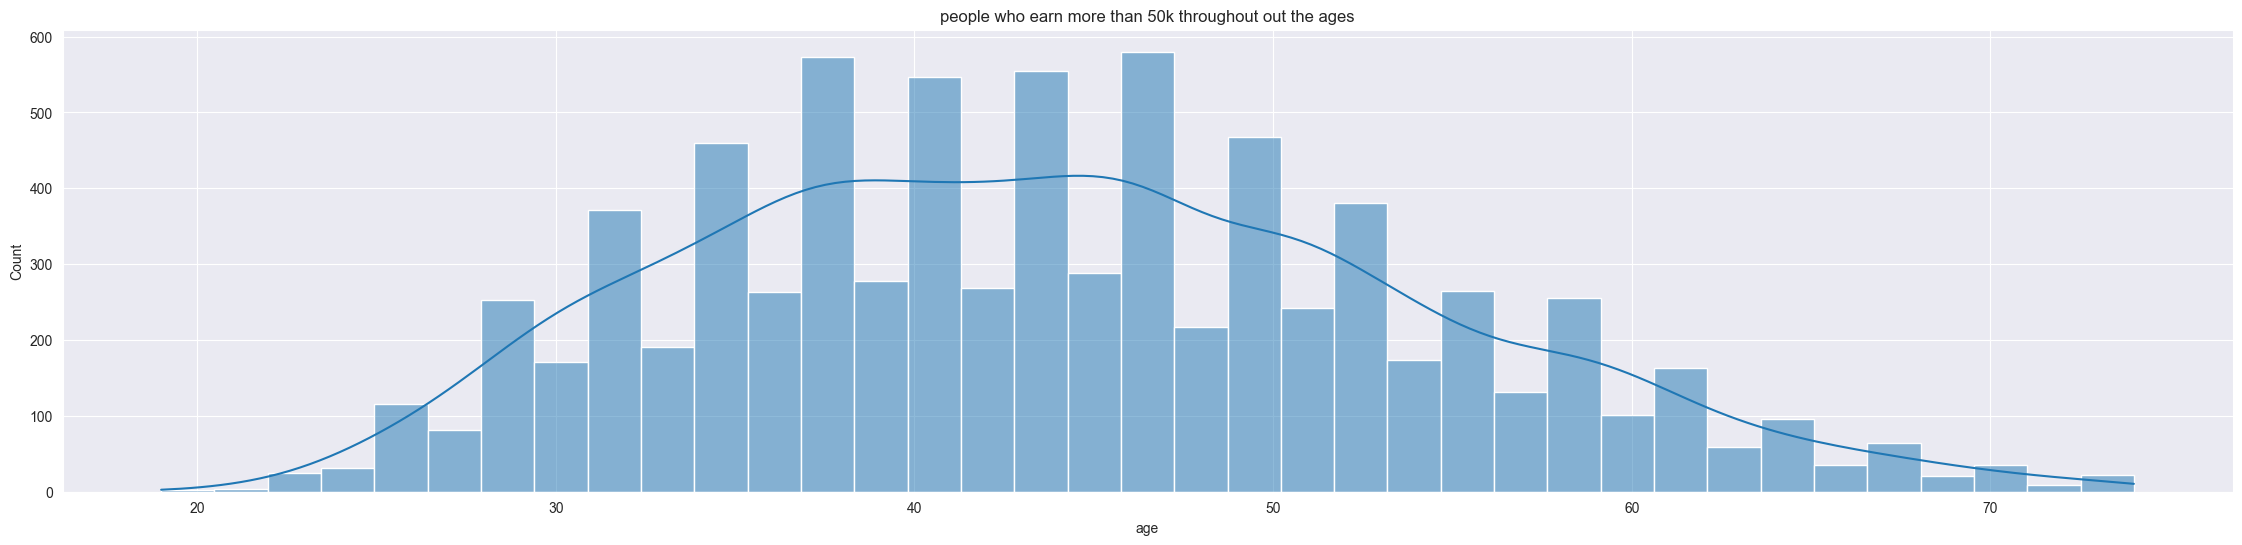

In [46]:
# Let's drop the outliers of the people who earn more than 50K and see the distribution as well as the boxplot
data = data.drop(data[(data['age'] >= 75) & (data['income'] == '>50K')].index)

# Distribution
above50k_earn = data[data['income'] == '>50K']['age']
plt.figure(figsize=(28, 6))
plt.title("people who earn more than 50k throughout out the ages")
sns.histplot(above50k_earn,kde=True, label=column)

<Axes: title={'center': 'people who earn less than 50k throughout the ages'}, xlabel='age', ylabel='Count'>

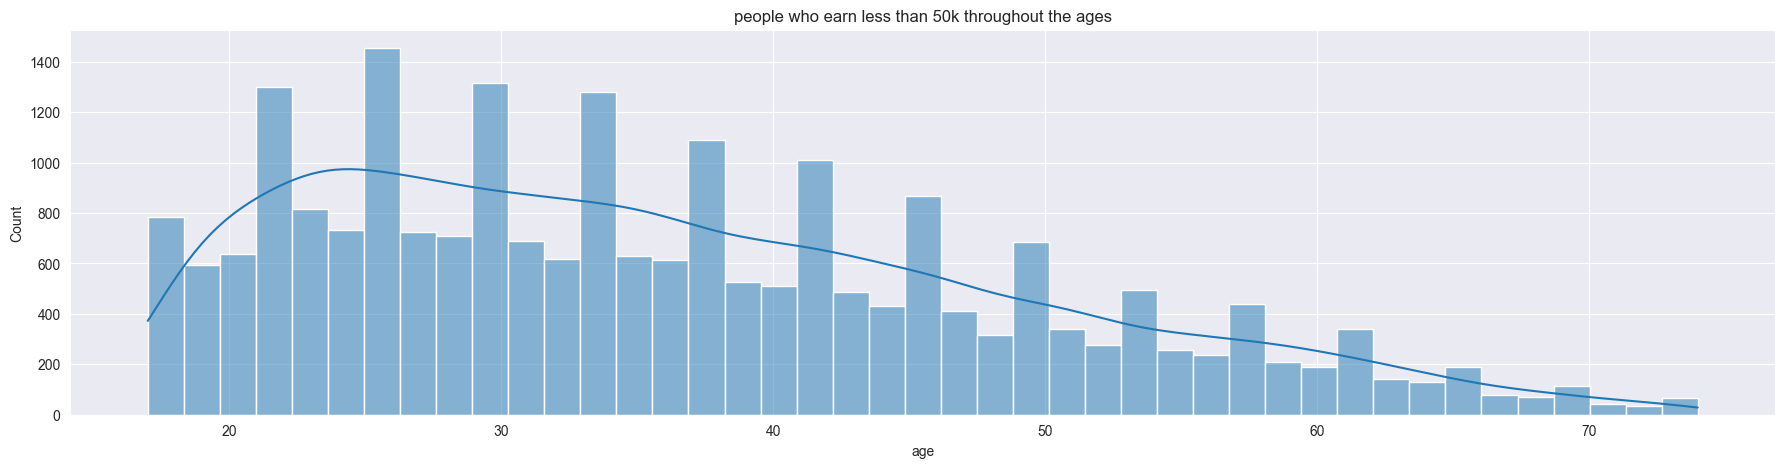

In [47]:
data = data.drop(data[(data['age'] >= 75) & (data['income'] == '<=50K')].index)
below50k_earn = data[data['income'] == '<=50K']['age']
plt.figure(figsize=(22, 5))
plt.title("people who earn less than 50k throughout the ages")
sns.histplot(below50k_earn,kde=True, label=column)

Now we can see that the people who earn more than 50k throughout the ages take a normal distribution which indicates now the age class is balanced.

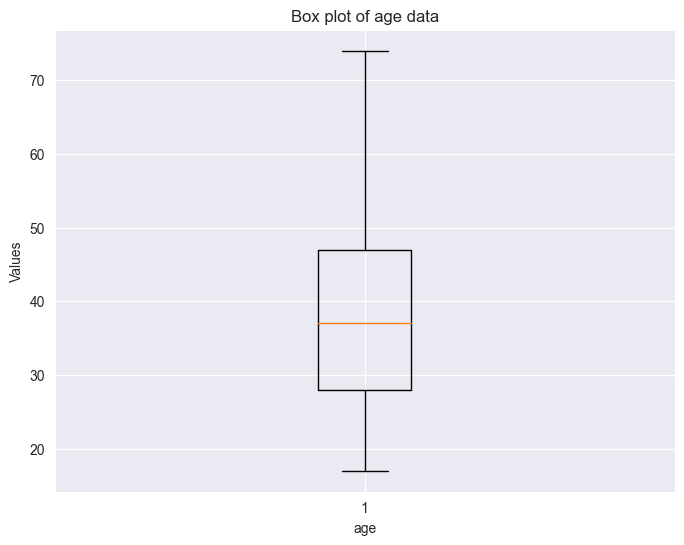

In [48]:
# Boxplot after cleaning the outliers
# Create a box plot for age feature
plt.figure(figsize=(8, 6))
plt.boxplot(data['age'])
plt.title('Box plot of age data')
plt.xlabel('age')
plt.ylabel('Values')
plt.show()

### Final weight outliers

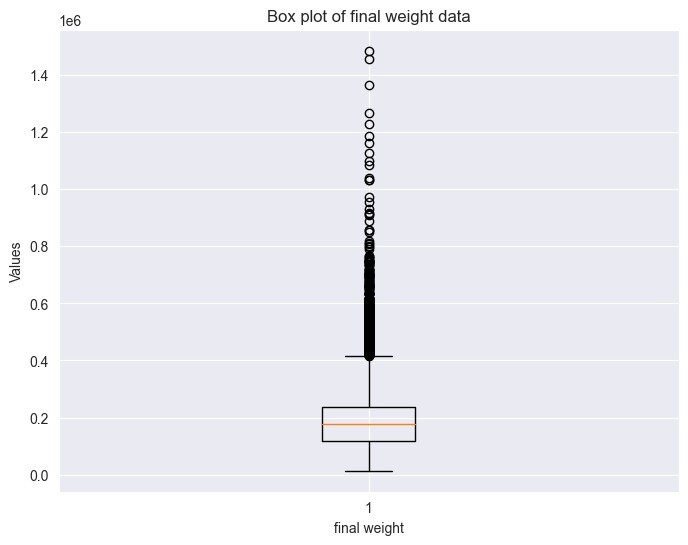

In [49]:
# Boxplot to see outliers of the final weight column
# Create a box plot for fnlwgt feature
plt.figure(figsize=(8, 6))
plt.boxplot(data['fnlwgt'])
plt.title('Box plot of final weight data')
plt.xlabel('final weight')
plt.ylabel('Values')
plt.show()

In [50]:
# Upper Bound of the Dataset

# Calculate Q1, Q3, and IQR
Q1 = data['fnlwgt'].quantile(0.25)
Q3 = data['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker value
upper_whisker = Q3 + 1.5 * IQR

# Find the highest data point within the upper whisker range
upper_bound_data = data['fnlwgt'][data['fnlwgt'] <= upper_whisker].max()

print("Upper bound within the boxplot:", upper_bound_data)

# Number of records upper the bound of the dataset\
fnlwgt_outliers = data[data['fnlwgt'] >= 417419].value_counts().sum()
print(f'number of outliers :- {fnlwgt_outliers}')

Upper bound within the boxplot: 416829
number of outliers :- 923


In [51]:
# Removing the final weight outliers
adult_dataset = data.drop(data[data['fnlwgt'] >= 417419].index)

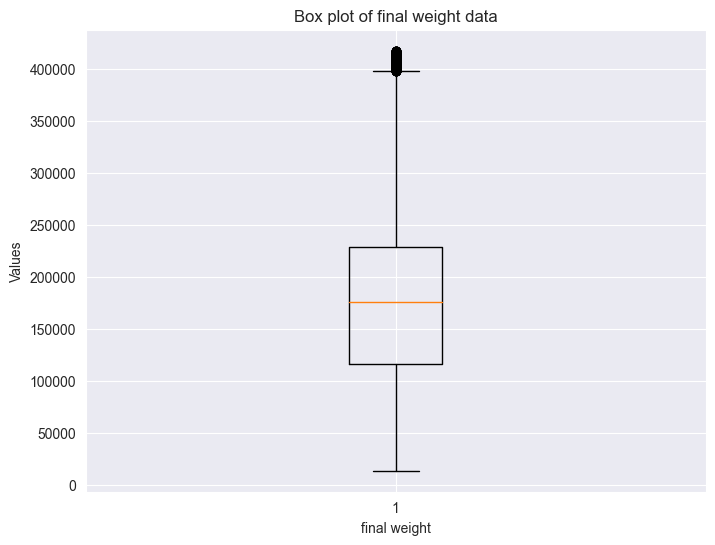

In [52]:
# Boxplot to see outliers of the final weight column
# Create a box plot for fnlwgt feature
plt.figure(figsize=(8, 6))
plt.boxplot(adult_dataset['fnlwgt'])
plt.title('Box plot of final weight data')
plt.xlabel('final weight')
plt.ylabel('Values')
plt.show()

### Working hours per-week outliers

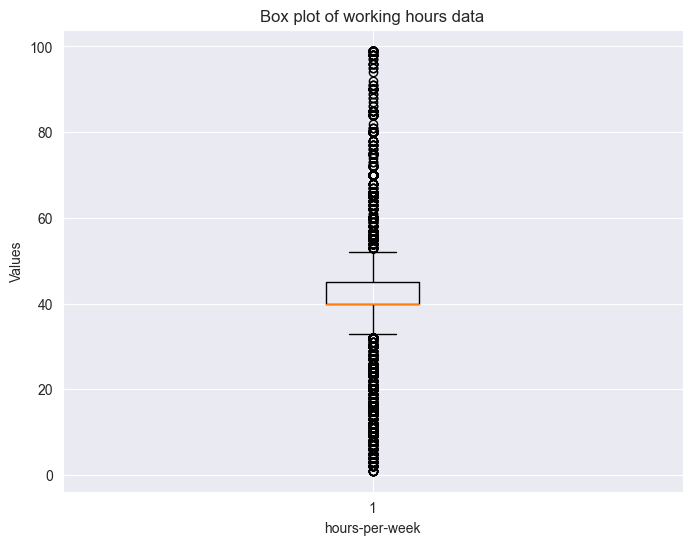

In [53]:
# Create a box plot for working hours feature
plt.figure(figsize=(8, 6))
plt.boxplot(data['hours-per-week'])
plt.title('Box plot of working hours data')
plt.xlabel('hours-per-week')
plt.ylabel('Values')
plt.show()

In [54]:
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K


### Principal component analysis

In [63]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data.drop(columns=["income"]))

PCA()

In [64]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

num_components = np.argmax(cumulative_variance >= 0.95) + 1

print("Number of components to capture 95% of variance :", num_components)

Number of components to capture 95% of variance : 1


### Label Encoder

In [56]:
# Define the categorical columns to be encoded
categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','income']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = data[["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", 
           "hours-per-week"]]
y =  data["income"]

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42)

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [61]:
# Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate models
print("Naïve Bayes Model:")
print(classification_report(y_test, nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))

print("\nRandom Forest Model:")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))

Naïve Bayes Model:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      7614
           1       0.65      0.34      0.45      2609

    accuracy                           0.78     10223
   macro avg       0.73      0.64      0.66     10223
weighted avg       0.77      0.78      0.76     10223

Accuracy: 0.7846033453976328

Random Forest Model:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      7614
           1       0.66      0.57      0.61      2609

    accuracy                           0.82     10223
   macro avg       0.76      0.74      0.75     10223
weighted avg       0.81      0.82      0.81     10223

Accuracy: 0.816590042062017
